**How to Activate the GPU**

---

As you open a colab notebook, you'll see a toolbar on the top of the page. There will be an option of 'Runtime', click on it. A dropdown menu will appear where you'll find the change runtype type, click on it. A new box will appear saying "Notebook Settings". Go to the 'Hardware accelerator' select 'GPU', you'll be having an option of choosing the type of GPU you are free for only premium colab user. Then you just save it. You are good to go now.

Runtime --> Change Runtime Type --> Hardware Accelerator [GPU] --> Save

In [ ]:
#Checking, if I have GPU active with me.
!nvidia-smi

Mon Jul 31 10:42:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
#Checking the number of processors we have with us.
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# **About the GPU**

---

**Specifications:** $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ **Nvidia Tesla T4**

1. FLOPS
   *  F16     $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 65  TFLOPS
   *  F32     $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 8   TFLOPS
   *  F64     $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 254 GFLOPS

2. Number of Cores   $~~~~~~~~~~~~~~~~~~~~~~~$ 2560 CUDA Cores

3. Clock Speed       $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 585 MHz

4. Memory Size    $~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$ 16 GB

5. Memory Bandwidth  $~~~~~~~~~~~~~~~~~~~~~~~$ 320 GB/s

In [ ]:
#Importing required libraries
import torch
import time
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
#Checking if GPU is available
if torch.cuda.is_available():
    #If it is, connecting to cuda
    device = torch.device("cuda")
else:
    #If not staying on cpu
    device = torch.device("cpu")

#Printing the device which we are using
print("using", device, "device")

using cuda device


# **CPU**

In [ ]:
#Creating two matrices of the some size
x = torch.randn(3200, 3200)
y = torch.randn(3200, 3200)

The above created matrices are currently laying on the DRAM.

In [ ]:
x

tensor([[ 0.8967, -0.3874,  0.1163,  ...,  0.1462,  1.6115,  0.6914],
        [-0.5029, -0.5831, -1.2811,  ...,  0.1230, -1.0870, -0.5209],
        [-0.0877, -0.4181,  0.2573,  ..., -0.5602, -0.1518, -0.2291],
        ...,
        [-0.5152,  0.8775,  0.1027,  ...,  0.7381, -1.4663, -0.8104],
        [-0.9024, -0.8147, -0.2028,  ...,  1.2402,  0.0854,  0.1285],
        [-0.4787,  0.7281, -2.0059,  ...,  1.0375,  2.2467,  0.9458]])

In [ ]:
y

tensor([[-0.4121, -2.1916,  2.0380,  ...,  1.9373, -0.0731, -0.6376],
        [ 2.8794, -0.6517, -1.5261,  ..., -0.6252, -0.0859,  1.2213],
        [ 0.9463, -0.4303, -0.9252,  ...,  1.0162,  1.2003,  0.6514],
        ...,
        [ 0.1477, -1.5656,  2.0976,  ...,  0.1768, -1.7263,  1.1178],
        [-0.3975,  0.6368, -1.2247,  ...,  0.6090, -1.0928, -0.1431],
        [-0.2863, -2.0751,  0.1945,  ..., -0.0789,  1.1006,  0.1550]])

In [ ]:
#Creating a empty list which will store the amount of time taken to perform the task for cpu
cpu_time = []

#Iterating the loop
for i in range(6):
  #Creating a varible which holds the current time
  start = time.time()

  #Storing the output matrix that we got after matrix multiplication into the varible
  result = torch.matmul(x,y)

  end = time.time()

  cpu_time.append(end-start)

#Verifying the device used to perform the above task
print("verify device:", result.device)

verify device: cpu


In the cell just above, I am using the created matrices {x,y} and performing some operation {x*y} on it. Then the data laying on RAM will be sent to the CPU/Host and there the computaion required for that operation is been done. This whole thing i.e operation is purely done on CPU, it doesn't even bother GPU until I invoke the GPU to come in action.

In [ ]:
result

tensor([[113.9264,  33.2752, -14.1124,  ..., -24.8591,  94.5309,  27.6495],
        [ 43.3433,  25.0147, -40.4899,  ..., -64.7027, -91.6875,  43.5161],
        [-70.8510,  -6.6080,  27.9859,  ..., -80.4385, 137.2208, -92.6423],
        ...,
        [-94.3531,  24.1283, 135.5516,  ..., -33.0914,  10.4520,  85.4628],
        [-52.3935,  26.6503,  68.9546,  ...,  27.0121, -30.6846,  65.0709],
        [-78.7877, -67.0541,  18.6228,  ...,  39.0649, -41.8985,  49.1260]])

In [ ]:
cpu_time

[0.8736889362335205,
 0.8558483123779297,
 0.8540983200073242,
 0.8729610443115234,
 2.130537271499634,
 1.5174884796142578]

# **GPU**

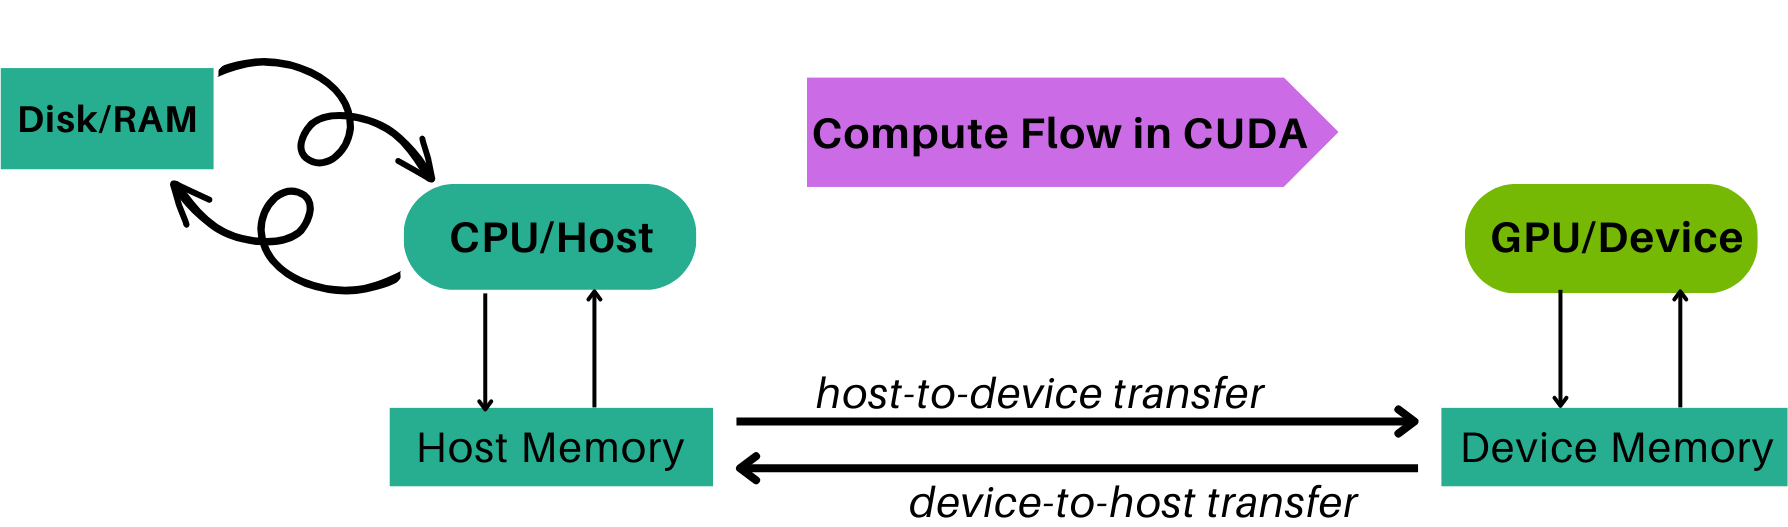

In [ ]:
#Reading the image
img = cv2.imread('/content/PPT (5).png')

#Displaying the image
cv2_imshow(img)

In [ ]:
#Till now the data was on the CPU/Host's memory, moving it to the GPU/Device's memory.
x_gpu = x.to(device)
y_gpu = y.to(device)

In the above cell of code. I am transferring the data to the device memory i.e GPU's memory from the host memory i.e CPU's memory

Technically I am performing `host to device transfer`.

In [ ]:
gpu_time = []
#Iterating the loop which performs the same task as the CPU but the GPU this time.
for i in range(6):
    start = time.time()
    result_gpu = torch.matmul(x_gpu,y_gpu)
    #Synchronizing the processors, one of the processor might be completing the task way quicker than the other.
    #So asking the processor to wait until the other processor finishes it's task too.
    torch.cuda.synchronize()
    end=time.time()
    gpu_time.append(end-start)
print("verify device:", result_gpu.device)

verify device: cuda:0


In [ ]:
result_gpu

tensor([[113.9265,  33.2752, -14.1124,  ..., -24.8591,  94.5309,  27.6495],
        [ 43.3434,  25.0147, -40.4900,  ..., -64.7027, -91.6873,  43.5161],
        [-70.8510,  -6.6079,  27.9859,  ..., -80.4385, 137.2207, -92.6423],
        ...,
        [-94.3532,  24.1283, 135.5517,  ..., -33.0913,  10.4520,  85.4627],
        [-52.3934,  26.6504,  68.9546,  ...,  27.0121, -30.6846,  65.0710],
        [-78.7877, -67.0540,  18.6227,  ...,  39.0649, -41.8985,  49.1260]],
       device='cuda:0')

Now that I had the data on the device memory, to perform operations the data will be sent to GPU where the required computation is done according to the task. Once that's done, GPU sends back the result to the device memory.

Now I won't be just leaving the result as it is. I would see it or store it somewhere. Now to display the result, CPU needs to come into action. As you might know that CPU is still the brain of the computer. So now the data i.e result is transferred back to the host memory and this process is called as
`device to host transfer`. Then the data will flow back to CPU from there CPU will communicate with the display hardware or with the disk according to the instructions we give.

In [ ]:
gpu_time

[3.062778949737549,
 0.023108959197998047,
 0.022962093353271484,
 0.022765636444091797,
 0.023041248321533203,
 0.02272820472717285]

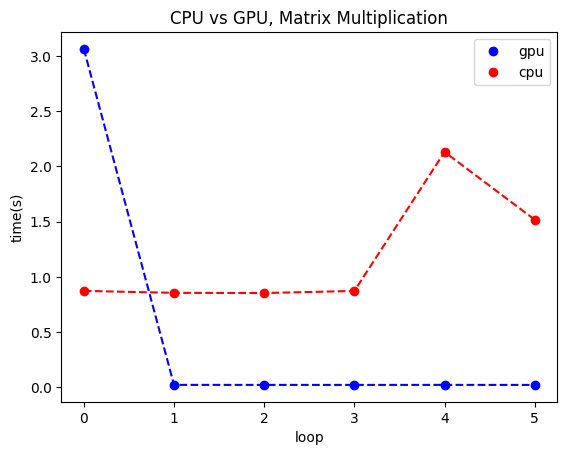

In [ ]:
loop = list(range(6))
#Plotting the graph between the time taken to execute the task for CPU and GPU
plt.plot(loop,gpu_time,'bo')
plt.plot(loop,cpu_time,'ro')
plt.plot(loop,gpu_time,'b--')
plt.plot(loop,cpu_time,'r--')
plt.ylabel('time(s)')
plt.xlabel('loop')
plt.title('CPU vs GPU, Matrix Multiplication')
plt.legend(['gpu', 'cpu'], loc='best')
plt.show()

As you might have observed how blazingly fast the GPUs are compared the CPUs. Again you could not appreciate it to the fullest as this difference was at very low-level. If you see the difference at the large scale, it would be huge.


And also, if you pay attention at the results of GPU. We see the task is been done for like 5 times, where the result in the first loop is poor than the rest of the loops. Yeah, that's because the concept known as `Caching`. In the first loop data needs to moved from the 'device memory' to the GPU.Once the memory is loaded into GPU, it will cache it. Now for the further loops, it's easy for GPUs to use the cached memory rather than again waiting for the data from the device memory. Hence we see that in the loops after the first, the time taken is too low compared to the first loop.

The results might differ from CPU to CPU and GPU to GPU. And Now will try to extend a bit and look at how GPUs perform while training CNN.

In [ ]:
#Import required libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
import cv2
import time
from google.colab.patches import cv2_imshow

MNIST Dataset

---


It is a large database of small, square 28x28 pixel grayscale images of handwritten single digits between 0 and 9. It consists of a total of 70,000 handwritten images of digits, with the training set having 60,000 images and the test set having 10,000. All images are labeled with the respective digit that they represent. There are a total of 10 classes of digits (from 0 to 9).

In [ ]:
#Loading in the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#Checking the shape and datatype
print('x_train shape and datatype of elements in it is \n',x_train.shape,x_train.dtype)
print('x_test shape and datatype of elements in it is \n',x_test.shape,x_test.dtype)
print('y_train shape and datatype of elements in it is \n',y_train.shape,y_train.dtype)
print('y_test shape and datatype of elements in it is \n',y_test.shape,y_test.dtype)

x_train shape and datatype of elements in it is 
 (60000, 28, 28) uint8
x_test shape and datatype of elements in it is 
 (10000, 28, 28) uint8
y_train shape and datatype of elements in it is 
 (60000,) uint8
y_test shape and datatype of elements in it is 
 (10000,) uint8


In [ ]:
#Plotting 10 random images from the training data and the respective labels
def plot_img():
  random_index = np.random.randint(0,x_train.shape[0],size=10)
  fig,axes = plt.subplots(2,5,figsize=(12,6))
  for i,ax in enumerate(axes.flat):
    random_img = x_train[random_index[i]]
    ax.set_title(y_train[random_index[i]])
    ax.imshow(random_img,cmap='gray')
    ax.axis('off')
  plt.tight_layout()
  plt.show()

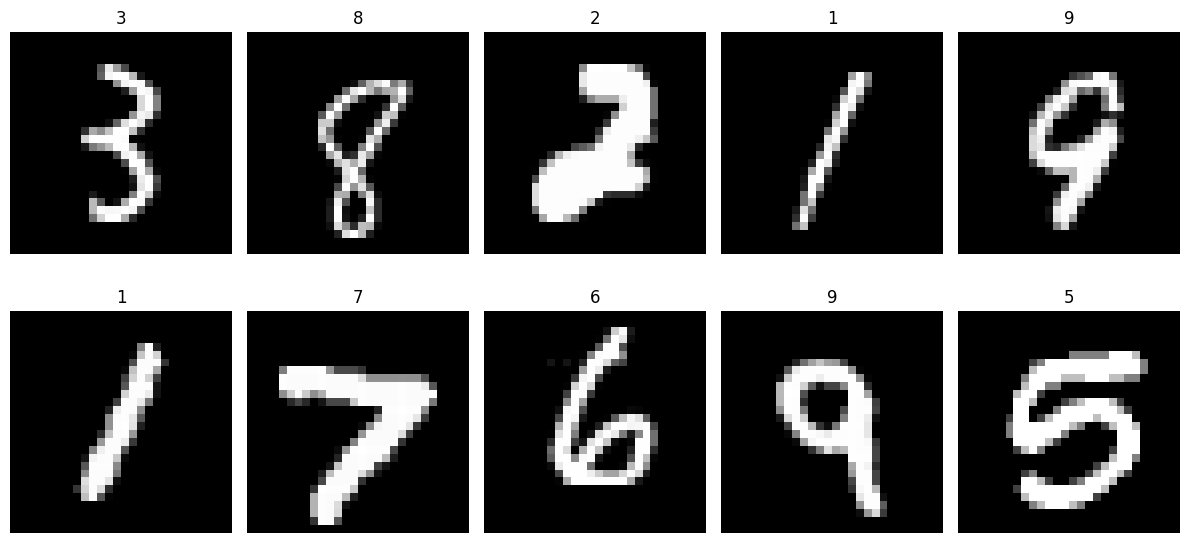

In [ ]:
plot_img()

In [ ]:
#Standardizing the training data
mean=np.mean(x_train)
std=np.std(x_train)
x_test = (x_test-mean)/std
x_train = (x_train-mean)/std

In [ ]:
x_train

array([[[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        ...,
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389]],

       [[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        ...,
        [-0.42407389, -0.42407389, -0.42407389, ..., -

In [ ]:
x_test

array([[[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        ...,
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389]],

       [[-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        [-0.42407389, -0.42407389, -0.42407389, ..., -0.42407389,
         -0.42407389, -0.42407389],
        ...,
        [-0.42407389, -0.42407389, -0.42407389, ..., -

In [ ]:
#As we have grayscale images, Reshaping the data into 3D Tensors
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], x_train.shape[2], 1)
print(x_train.shape,x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [ ]:
#Encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train.shape,y_test.shape)

(60000, 10) (10000, 10)


Till here it was all just the basic pre-processing needed to train the network. The steps above this cell will be same if we have CPU or GPU.

# **CPU**

In [ ]:
#Defining the parameters that we need.
num_filter=32
num_dense=512
drop_dense=0.7
ac='relu'
learningrate=0.001

#Staying on the CPU for training
with tf.device("/cpu:0"):
    # Create a sequential model
    model = Sequential()

    # Add the first Conv2D layer with 32 filters, 3x3 kernel size, 'relu' activation, and input shape (28, 28, 1)
    model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28,1), padding='same'))

    # Apply Batch Normalization to normalize the outputs of the previous Conv2D layer
    model.add(BatchNormalization(axis=-1))

    # Add another Conv2D layer with 32 filters and 'relu' activation
    model.add(Conv2D(num_filter, (3, 3), activation=ac, padding='same'))

    # Apply Batch Normalization again
    model.add(BatchNormalization(axis=-1))

    # Add a MaxPooling2D layer to reduce spatial dimensions
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add another set of Conv2D and Batch Normalization layers, doubling the number of filters to 64
    model.add(Conv2D(2*num_filter, (3, 3), activation=ac, padding='same'))
    model.add(BatchNormalization(axis=-1))
    model.add(Conv2D(2*num_filter, (3, 3), activation=ac, padding='same'))
    model.add(BatchNormalization(axis=-1))

    # Add another MaxPooling2D layer to further reduce spatial dimensions
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the 3D output to a 1D vector
    model.add(Flatten())

    # Add a dense (fully connected) layer with 512 neurons and 'relu' activation
    model.add(Dense(num_dense, activation=ac))

    # Apply Batch Normalization to the dense layer
    model.add(BatchNormalization())

    # Add a Dropout layer to randomly drop 70% of neurons during training to prevent overfitting
    model.add(Dropout(drop_dense))

    # Add the final dense layer with 10 neurons and 'softmax' activation for multi-class classification
    model.add(Dense(10, activation='softmax'))

    # Compile the model with categorical cross-entropy loss, accuracy as the evaluation metric, and SGD optimizer with a learning rate of 0.001
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')

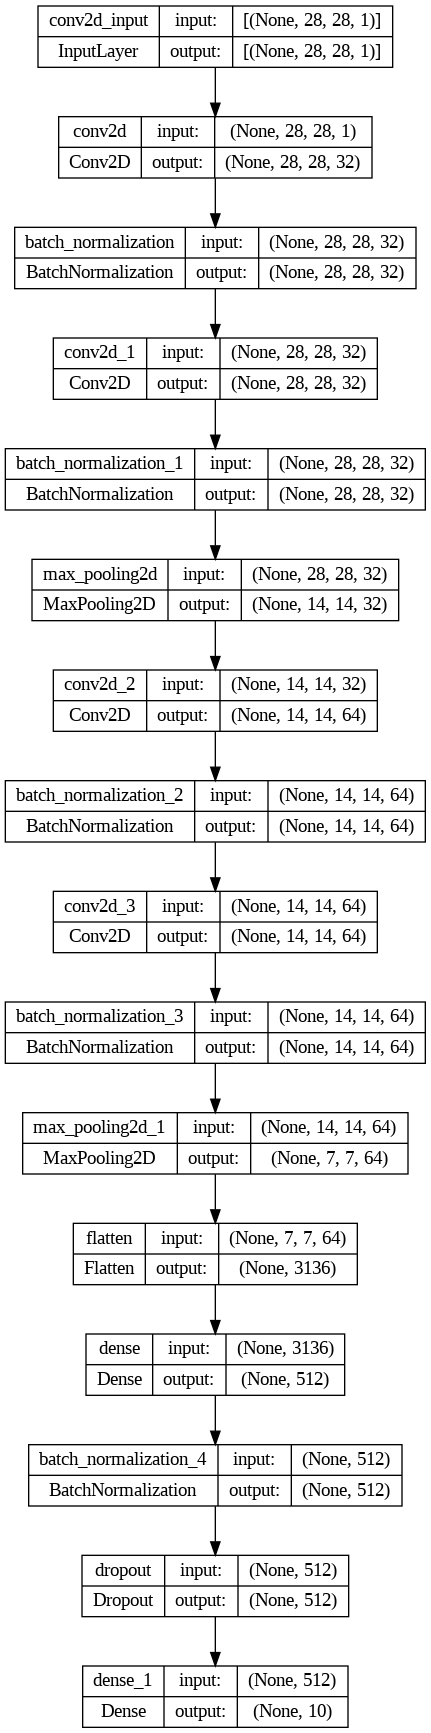

In [ ]:
#Plotting the arch
plot_model(model,to_file='arc_nn.png',show_shapes=True)

In [ ]:
#Creating the lists, which stores the time it took to train for each batch size.
cpu_list=[]
batch_sizes = []

#Staying on the CPU
with tf.device("/cpu:0"):

    #Iterating through a loop for like 6 times
    for i in range(0,7):
        #Defining the batch size, which will be incrementing
        k=8*2**i
        print("batch size "+str(k))
        start = time.time()
        #Fitting the model
        model.fit(x_train, y_train, batch_size=k, epochs=1)
        end = time.time()
        #Appending the results to the lists we created
        cpu_list.append(int(end-start))
        batch_sizes.append(k)

batch size 8
7500/7500 [==============================] - 474s 63ms/step - loss: 0.2270 - accuracy: 0.9329
batch size 16
3750/3750 [==============================] - 393s 105ms/step - loss: 0.0696 - accuracy: 0.9793
batch size 32
1875/1875 [==============================] - 358s 191ms/step - loss: 0.0426 - accuracy: 0.9865
batch size 64
938/938 [==============================] - 340s 363ms/step - loss: 0.0324 - accuracy: 0.9902
batch size 128
469/469 [==============================] - 334s 711ms/step - loss: 0.0273 - accuracy: 0.9917
batch size 256
235/235 [==============================] - 328s 1s/step - loss: 0.0258 - accuracy: 0.9921
batch size 512
 98/118 [=======================>......] - ETA: 57s - loss: 0.0251 - accuracy: 0.9926

In [ ]:
#Printing the list which contains the time taken to train the network with different batch size on CPU
print(cpu_list)

[473, 443, 382, 382, 382, 328, 382]


In [ ]:
#Computing the average time that it took to train the network on CPU
avg_time_cpu = sum(cpu_list)/len(cpu_list)
avg_time_cpu

396.0

# **GPU**

In [ ]:
#Defining the parameters that we need.
num_filter=32
num_dense=512
drop_dense=0.7
ac='relu'
learningrate=0.001

# Create a sequential model
model = Sequential()

# Add the first Conv2D layer with 32 filters, 3x3 kernel size, 'relu' activation, and input shape (28, 28, 1)
model.add(Conv2D(num_filter, (3, 3), activation=ac, input_shape=(28, 28, 1), padding='same'))

# Apply Batch Normalization to normalize the outputs of the previous Conv2D layer
model.add(BatchNormalization(axis=-1))

# Add another Conv2D layer with 32 filters and 'relu' activation
model.add(Conv2D(num_filter, (3, 3), activation=ac, padding='same'))

# Apply Batch Normalization again
model.add(BatchNormalization(axis=-1))

# Add a MaxPooling2D layer to reduce spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add another set of Conv2D and Batch Normalization layers, doubling the number of filters to 64
model.add(Conv2D(2*num_filter, (3, 3), activation=ac, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filter, (3, 3), activation=ac, padding='same'))
model.add(BatchNormalization(axis=-1))

# Add another MaxPooling2D layer to further reduce spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D output to a 1D vector
model.add(Flatten())

# Add a dense (fully connected) layer with 512 neurons and 'relu' activation
model.add(Dense(num_dense, activation=ac))

# Apply Batch Normalization to the dense layer
model.add(BatchNormalization())

# Add a Dropout layer to randomly drop 70% of neurons during training to prevent overfitting
model.add(Dropout(drop_dense))

# Add the final dense layer with 10 neurons and 'softmax' activation for multi-class classification
model.add(Dense(10, activation='softmax'))

# Compile the model with categorical cross-entropy loss, accuracy as the evaluation metric, and SGD optimizer with a learning rate of 0.001
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='SGD')

In [ ]:
gpu_list=[]
batch_sizes = []
with tf.device("/gpu:0"):
    for i in range(0,7):
        k=8*2**i
        print("batch size "+str(k))
        t1 = time.time()
        model.fit(x_train, y_train, batch_size=k, epochs=1, validation_data=(x_test, y_test))
        t2 = time.time()
        gpu_list.append(int(t2-t1))
        batch_sizes.append(k)

batch size 8
7500/7500 [==============================] - 50s 7ms/step - loss: 0.1637 - accuracy: 0.9520 - val_loss: 0.0396 - val_accuracy: 0.9879
batch size 16
3750/3750 [==============================] - 28s 7ms/step - loss: 0.0659 - accuracy: 0.9801 - val_loss: 0.0257 - val_accuracy: 0.9907
batch size 32
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0198 - val_accuracy: 0.9924
batch size 64
938/938 [==============================] - 8s 8ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0191 - val_accuracy: 0.9934
batch size 128
469/469 [==============================] - 6s 12ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0194 - val_accuracy: 0.9931
batch size 256
235/235 [==============================] - 5s 19ms/step - loss: 0.0257 - accuracy: 0.9917 - val_loss: 0.0187 - val_accuracy: 0.9937
batch size 512
118/118 [==============================] - 5s 34ms/step - loss: 0.0242 - accuracy: 0.9926 - val_loss: 0

In [ ]:
#Printing the list which contains the time taken to train the network with different batch size on GPU
print(gpu_list)

[82, 28, 16, 8, 6, 5, 5]


In [ ]:
#Computing the average time that it took to train the network on GPU
avg_time_gpu = sum(gpu_list)/len(gpu_list)
avg_time_gpu

21.428571428571427

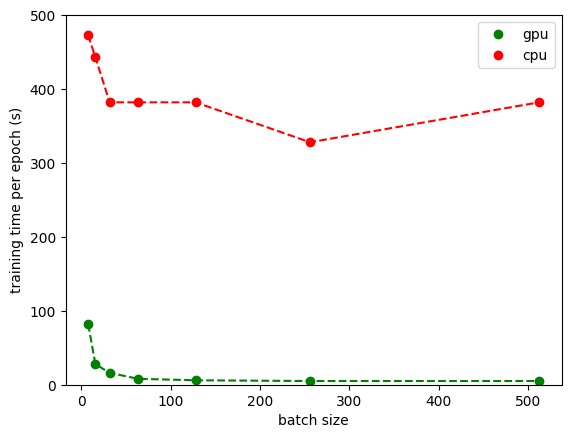

In [ ]:
#Plotting the graph between the time taken and batchsize for CPU and GPU
plt.plot(batch_sizes,gpu_list,'bo',color='green')
plt.plot(batch_sizes,cpu_list,'ro')
plt.plot(batch_sizes,gpu_list,'b--',color='green')
plt.plot(batch_sizes,cpu_list,'r--')
plt.ylabel('training time per epoch (s)')
plt.xlabel('batch size')
plt.legend(['gpu', 'cpu'], loc='upper right')
plt.ylim([0,500])
plt.show()

The prevision example when we saw about the flow in CUDA was on small-scale. Just a basic matrix multiplication. There you might have not noticed any huge difference. But here, you can see how it varies when it comes to large-scale.